In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.metrics import accuracy_score

# Preprocess the data

# Load the first dataset
df1 = pd.read_csv('/content/drive/MyDrive/dataset 01.csv')
df1.head()

,facid,branch,yearsem,subname,HallticketNo,attendance percentage roundup,sublabname
0,TESTSSCCE0170,CIVIL,2nd Year,ELECTRICAL & ELECTRONICS ENGG,11N01A0119,75,CIVIL2_EEE
1,TESTSSCCE0170,CIVIL,2nd Year,ELECTRICAL & ELECTRONICS ENGG,11N01A0122,95,CIVIL2_EEE
2,TESTSSCCE0170,CIVIL,2nd Year,ELECTRICAL & ELECTRONICS ENGG,12N01A0101,95,CIVIL2_EEE
3,TESTSSCCE0170,CIVIL,2nd Year,ELECTRICAL & ELECTRONICS ENGG,12N01A0102,90,CIVIL2_EEE
4,TESTSSCCE0170,CIVIL,2nd Year,ELECTRICAL & ELECTRONICS ENGG,12N01A0103,100,CIVIL2_EEE


## **Data Pre-processing**

In [ ]:
df1['subname']

0             ELECTRICAL & ELECTRONICS ENGG
1             ELECTRICAL & ELECTRONICS ENGG
2             ELECTRICAL & ELECTRONICS ENGG
3             ELECTRICAL & ELECTRONICS ENGG
4             ELECTRICAL & ELECTRONICS ENGG
                        ...                
11667    UNCONVENTIONAL MACHINING PROCESSES
11668    UNCONVENTIONAL MACHINING PROCESSES
11669    UNCONVENTIONAL MACHINING PROCESSES
11670    UNCONVENTIONAL MACHINING PROCESSES
11671    UNCONVENTIONAL MACHINING PROCESSES
Name: subname, Length: 11672, dtype: object

In [ ]:
unique_values = df1['subname'].unique()

In [ ]:
print(unique_values)

['ELECTRICAL & ELECTRONICS ENGG' 'FLUID MECHANICS' 'MATHEMATICS-II'
 'MANAGERIAL ECONOMICS & FINANCIAL ANALYSIS' 'STRENGTH OF MATERIALS-I'
 'STRENGTH OF MATERIALS LAB' 'SURVEYING' 'SURVEYING LAB-I'
 'CONCRETE TECHNOLOGY' 'DESIGN OF REINFORCED CONCRETE STRUCTURES'
 'ENGINEERING GEOLOGY' 'ENGINEERING GEOLOGY (LAB)' 'ELECTIVE SUBJECT'
 'FLUID MECHANICS AND HYDRAULIC MACHINERY (LAB)'
 'GEOTECHNICAL ENGINEERING - I' 'WATER RESOURCES ENGINEERING - I'
 'ADVANCED FOUNDATION ENGINEERING' 'CONCRETE AND HIGHWAY MATERIALS LAB'
 'DISASTER MANAGEMENT AND MITIGATION' 'ESTIMATING AND COSTING'
 'ENVIRONMENTAL ENGINEERING LAB' 'GIS AND REMOTE SENSING'
 'PAVEMENT DESIGN' 'WATERSHED MANAGEMENT' 'BASIC ELECTRICAL ENGG'
 'DATA STRUCTURES LAB THROUGH C++' 'DIGITAL LOGIC DESIGN'
 'DATA STRUCTURES THROUGH C++' 'ELECTRONIC DEVICES & CIRCUITS'
 'ELECTRICAL AND ELECTRONICS LAB'
 'MATHEMATICAL FOUNDATION OF COMPUTER SCIENCE'
 'PROBABILITY AND STATISTICS'
 'COMPUTER NETWORKS & OPERATING SYSTEMS (LAB)'
 'DATA COMMUN

In [ ]:
del df1['sublabname']

In [ ]:
df1.head()

,facid,branch,yearsem,subname,HallticketNo,attendance percentage roundup
0,TESTSSCCE0170,CIVIL,2nd Year,ELECTRICAL & ELECTRONICS ENGG,11N01A0119,75
1,TESTSSCCE0170,CIVIL,2nd Year,ELECTRICAL & ELECTRONICS ENGG,11N01A0122,95
2,TESTSSCCE0170,CIVIL,2nd Year,ELECTRICAL & ELECTRONICS ENGG,12N01A0101,95
3,TESTSSCCE0170,CIVIL,2nd Year,ELECTRICAL & ELECTRONICS ENGG,12N01A0102,90
4,TESTSSCCE0170,CIVIL,2nd Year,ELECTRICAL & ELECTRONICS ENGG,12N01A0103,100


In [ ]:
del df1['subname']

In [ ]:
del df1['facid']

In [ ]:
df1.head()

,branch,yearsem,HallticketNo,attendance percentage roundup
0,CIVIL,2nd Year,11N01A0119,75
1,CIVIL,2nd Year,11N01A0122,95
2,CIVIL,2nd Year,12N01A0101,95
3,CIVIL,2nd Year,12N01A0102,90
4,CIVIL,2nd Year,12N01A0103,100


In [ ]:
# Load the second dataset
df2 = pd.read_csv('/content/drive/MyDrive/dataset 02.csv')

In [ ]:
df2.head()

,HallticketNo,SubjectCode,SubjectName,InternalMarks,ExternalMarks,TotalMarks,Credits,transactionid
0,09N01A0101,51002,MATHEMATICS - I,16,5,21,0,1
1,09N01A0106,51002,MATHEMATICS - I,12,0,12,0,2
2,09N01A0110,51004,ENGINEERING PHYSICS,19,41,60,4,3
3,09N01A0111,51002,MATHEMATICS - I,19,6,25,0,4
4,09N01A0117,51002,MATHEMATICS - I,16,12,28,0,5


In [ ]:
df2=df2.rename(columns={'SubjectName':'subname'})

In [ ]:
df2.head()

,HallticketNo,SubjectCode,subname,InternalMarks,ExternalMarks,TotalMarks,Credits,transactionid
0,09N01A0101,51002,MATHEMATICS - I,16,5,21,0,1
1,09N01A0106,51002,MATHEMATICS - I,12,0,12,0,2
2,09N01A0110,51004,ENGINEERING PHYSICS,19,41,60,4,3
3,09N01A0111,51002,MATHEMATICS - I,19,6,25,0,4
4,09N01A0117,51002,MATHEMATICS - I,16,12,28,0,5


In [ ]:
del df2['transactionid']

In [ ]:
del df2['Credits']

In [ ]:
print(df2.describe())

       InternalMarks  ExternalMarks    TotalMarks
count   78243.000000   78243.000000  78243.000000
mean       19.969799      37.366921     57.356083
std         7.254616      16.945070     19.914253
min         0.000000      -2.000000      0.000000
25%        16.000000      29.000000     47.000000
50%        19.000000      38.000000     59.000000
75%        22.000000      46.000000     69.000000
max        50.000000     149.000000    199.000000


## **Merging two datasets**

In [ ]:
# Merge the two datasets
merged_df = pd.merge(df1, df2, on='HallticketNo')

# Display the merged dataset
merged_df.head()

,branch,yearsem,HallticketNo,attendance percentage roundup,SubjectCode,subname,InternalMarks,ExternalMarks,TotalMarks
0,CIVIL,2nd Year,11N01A0119,75,51001,ENGLISH,6,-1,6
1,CIVIL,2nd Year,11N01A0119,75,51002,MATHEMATICS - I,6,-1,6
2,CIVIL,2nd Year,11N01A0119,75,51003,ENGINEERING MECHANICS,8,-1,8
3,CIVIL,2nd Year,11N01A0119,75,51004,ENGINEERING PHYSICS,10,-1,10
4,CIVIL,2nd Year,11N01A0119,75,51005,ENGINEERING CHEMISTRY,5,-1,5


In [ ]:
merged_df

,branch,yearsem,HallticketNo,attendance percentage roundup,SubjectCode,subname,InternalMarks,ExternalMarks,TotalMarks
0,CIVIL,2nd Year,11N01A0119,75,51001,ENGLISH,6,-1,6
1,CIVIL,2nd Year,11N01A0119,75,51002,MATHEMATICS - I,6,-1,6
2,CIVIL,2nd Year,11N01A0119,75,51003,ENGINEERING MECHANICS,8,-1,8
3,CIVIL,2nd Year,11N01A0119,75,51004,ENGINEERING PHYSICS,10,-1,10
4,CIVIL,2nd Year,11N01A0119,75,51005,ENGINEERING CHEMISTRY,5,-1,5
...,...,...,...,...,...,...,...,...,...
318609,MECH,4th Year,11N05A0307,89,56020,HEAT TRANSFER,12,28,40
318610,MECH,4th Year,11N05A0307,89,56022,AUTOMOBILE ENGINEERING,20,27,47
318611,MECH,4th Year,11N05A0307,89,56604,HEAT TRANSFER (LAB),22,46,68
318612,MECH,4th Year,11N05A0307,89,56605,ADVANCED ENGLISH COMMUNICATION SKILLS (LAB),19,34,53


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318614 entries, 0 to 318613
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   branch                         318614 non-null  object
 1   yearsem                        318614 non-null  object
 2   HallticketNo                   318614 non-null  object
 3   attendance percentage roundup  318614 non-null  int64 
 4   SubjectCode                    318614 non-null  object
 5   subname                        318614 non-null  object
 6   InternalMarks                  318614 non-null  int64 
 7   ExternalMarks                  318614 non-null  int64 
 8   TotalMarks                     318614 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 24.3+ MB


In [ ]:
merged_df.head(100)

,branch,yearsem,HallticketNo,attendance percentage roundup,SubjectCode,subname,InternalMarks,ExternalMarks,TotalMarks
0,CIVIL,2nd Year,11N01A0119,75,51001,ENGLISH,6,-1,6
1,CIVIL,2nd Year,11N01A0119,75,51002,MATHEMATICS - I,6,-1,6
2,CIVIL,2nd Year,11N01A0119,75,51003,ENGINEERING MECHANICS,8,-1,8
3,CIVIL,2nd Year,11N01A0119,75,51004,ENGINEERING PHYSICS,10,-1,10
4,CIVIL,2nd Year,11N01A0119,75,51005,ENGINEERING CHEMISTRY,5,-1,5
...,...,...,...,...,...,...,...,...,...
95,CIVIL,2nd Year,11N01A0119,64,51600,COMPUTER PROGRAMMING LAB,0,-1,0
96,CIVIL,2nd Year,11N01A0119,64,51601,ENGG. PHYSICS & ENGG. CHEMISTRY LAB,10,-1,10
97,CIVIL,2nd Year,11N01A0119,64,51602,ENGLISH LANGUAGE COMMUNICATION SKILLS LAB,7,-1,7
98,CIVIL,2nd Year,11N01A0119,64,51603,ENGINEERING WORKSHOP & IT WORKSHOP,0,-1,0


In [ ]:

df3=pd.read_csv('/content/drive/MyDrive/Thresh hold marks.csv')

In [ ]:
df3.head(20)

,SubjectName,Thresh hold marks
0,MATHEMATICS - I,16
1,ENGINEERING PHYSICS,16
2,ENGINEERING CHEMISTRY,16
3,ENGLISH,16
4,ENGINEERING MECHANICS,16
5,COMPUTER PROGRAMMING & DATA STRUCTURES,16
6,ENGINEERING DRAWING,16
7,MATHEMATICAL METHODS,16
8,ENGG. PHYSICS & ENGG. CHEMISTRY LAB,16
9,ENGLISH LANGUAGE COMMUNICATION SKILLS LAB,16


In [ ]:
df3=df3.rename(columns={'SubjectName':'subname'})

In [ ]:
table_1=pd.merge(merged_df,df3,on='subname')

In [ ]:
table_1.head()

,branch,yearsem,HallticketNo,attendance percentage roundup,SubjectCode,subname,InternalMarks,ExternalMarks,TotalMarks,Thresh hold marks
0,CIVIL,2nd Year,11N01A0119,75,51001,ENGLISH,6,-1,6,16
1,CIVIL,2nd Year,11N01A0119,75,51001,ENGLISH,6,15,21,16
2,CIVIL,2nd Year,11N01A0119,66,51001,ENGLISH,6,-1,6,16
3,CIVIL,2nd Year,11N01A0119,66,51001,ENGLISH,6,15,21,16
4,CIVIL,2nd Year,11N01A0119,83,51001,ENGLISH,6,-1,6,16


In [ ]:
table_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135508 entries, 0 to 135507
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   branch                         135508 non-null  object
 1   yearsem                        135508 non-null  object
 2   HallticketNo                   135508 non-null  object
 3   attendance percentage roundup  135508 non-null  int64 
 4   SubjectCode                    135508 non-null  object
 5   subname                        135508 non-null  object
 6   InternalMarks                  135508 non-null  int64 
 7   ExternalMarks                  135508 non-null  int64 
 8   TotalMarks                     135508 non-null  int64 
 9   Thresh hold marks              135508 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 11.4+ MB


In [ ]:
table_1.shape

(135508, 10)

In [ ]:
# Select the two attributes to compare
attribute1 = 'TotalMarks'
attribute2 = 'Thresh hold marks'

# Compare the two attributes

comparison = table_1[attribute1] < table_1[attribute2]
result = comparison.replace({True: "0", False: "1"})

# Print the updated result
result

0         0
1         1
2         0
3         1
4         0
         ..
135503    1
135504    1
135505    1
135506    1
135507    1
Length: 135508, dtype: object

In [ ]:
table_1.insert(loc=2,column='Predicted_result',value=result)

In [ ]:
table_1.head(200)

,branch,yearsem,Predicted_result,HallticketNo,attendance percentage roundup,SubjectCode,subname,InternalMarks,ExternalMarks,TotalMarks,Thresh hold marks
0,CIVIL,2nd Year,0,11N01A0119,75,51001,ENGLISH,6,-1,6,16
1,CIVIL,2nd Year,1,11N01A0119,75,51001,ENGLISH,6,15,21,16
2,CIVIL,2nd Year,0,11N01A0119,66,51001,ENGLISH,6,-1,6,16
3,CIVIL,2nd Year,1,11N01A0119,66,51001,ENGLISH,6,15,21,16
4,CIVIL,2nd Year,0,11N01A0119,83,51001,ENGLISH,6,-1,6,16
...,...,...,...,...,...,...,...,...,...,...,...
195,CIVIL,2nd Year,1,12N01A0121,64,51001,ENGLISH,20,50,70,16
196,CIVIL,2nd Year,1,12N01A0121,64,51001,ENGLISH,20,50,70,16
197,CIVIL,2nd Year,1,12N01A0121,67,51001,ENGLISH,20,50,70,16
198,CIVIL,2nd Year,1,12N01A0121,85,51001,ENGLISH,20,50,70,16


In [ ]:
table_1['ExternalMarks']=table_1['ExternalMarks'].replace(-1,0)

In [ ]:
table_1.head(100)

,branch,yearsem,Predicted_result,HallticketNo,attendance percentage roundup,SubjectCode,subname,InternalMarks,ExternalMarks,TotalMarks,Thresh hold marks
0,CIVIL,2nd Year,0,11N01A0119,75,51001,ENGLISH,6,0,6,16
1,CIVIL,2nd Year,1,11N01A0119,75,51001,ENGLISH,6,15,21,16
2,CIVIL,2nd Year,0,11N01A0119,66,51001,ENGLISH,6,0,6,16
3,CIVIL,2nd Year,1,11N01A0119,66,51001,ENGLISH,6,15,21,16
4,CIVIL,2nd Year,0,11N01A0119,83,51001,ENGLISH,6,0,6,16
...,...,...,...,...,...,...,...,...,...,...,...
95,CIVIL,2nd Year,1,12N01A0108,100,51001,ENGLISH,19,58,77,16
96,CIVIL,2nd Year,1,12N01A0109,90,51001,ENGLISH,17,45,62,16
97,CIVIL,2nd Year,1,12N01A0109,94,51001,ENGLISH,17,45,62,16
98,CIVIL,2nd Year,1,12N01A0109,94,51001,ENGLISH,17,45,62,16


In [ ]:
table_1['Thresh hold marks']=table_1['Thresh hold marks'].replace(16,40)

In [ ]:
table_1.head()

,branch,yearsem,Predicted_result,HallticketNo,attendance percentage roundup,SubjectCode,subname,InternalMarks,ExternalMarks,TotalMarks,Thresh hold marks
0,CIVIL,2nd Year,0,11N01A0119,75,51001,ENGLISH,6,0,6,40
1,CIVIL,2nd Year,1,11N01A0119,75,51001,ENGLISH,6,15,21,40
2,CIVIL,2nd Year,0,11N01A0119,66,51001,ENGLISH,6,0,6,40
3,CIVIL,2nd Year,1,11N01A0119,66,51001,ENGLISH,6,15,21,40
4,CIVIL,2nd Year,0,11N01A0119,83,51001,ENGLISH,6,0,6,40


In [ ]:
print(table_1.describe())

       attendance percentage roundup  InternalMarks  ExternalMarks  \
count                  135508.000000  135508.000000  135508.000000   
mean                       69.042802      18.053989      34.409762   
std                        23.900297       4.031305      15.304293   
min                         0.000000       0.000000       0.000000   
25%                        55.000000      15.000000      26.000000   
50%                        72.000000      18.000000      36.000000   
75%                        87.000000      21.000000      45.000000   
max                       120.000000      25.000000      75.000000   

          TotalMarks  Thresh hold marks  
count  135508.000000           135508.0  
mean       52.463751               40.0  
std        17.738599                0.0  
min         0.000000               40.0  
25%        43.000000               40.0  
50%        55.000000               40.0  
75%        65.000000               40.0  
max       100.000000             

In [ ]:

attribute1 = 'TotalMarks'
attribute2 = 'Thresh hold marks'
comparison = table_1[attribute1] < table_1[attribute2]
result = comparison.replace({True: "0", False: "1"})


In [ ]:
table_1.insert(loc=2,column='Actual_result',value=result)

In [ ]:
table_1.head(100)

,branch,yearsem,Actual_result,Predicted_result,HallticketNo,attendance percentage roundup,SubjectCode,subname,InternalMarks,ExternalMarks,TotalMarks,Thresh hold marks
0,CIVIL,2nd Year,0,0,11N01A0119,75,51001,ENGLISH,6,0,6,40
1,CIVIL,2nd Year,0,1,11N01A0119,75,51001,ENGLISH,6,15,21,40
2,CIVIL,2nd Year,0,0,11N01A0119,66,51001,ENGLISH,6,0,6,40
3,CIVIL,2nd Year,0,1,11N01A0119,66,51001,ENGLISH,6,15,21,40
4,CIVIL,2nd Year,0,0,11N01A0119,83,51001,ENGLISH,6,0,6,40
...,...,...,...,...,...,...,...,...,...,...,...,...
95,CIVIL,2nd Year,1,1,12N01A0108,100,51001,ENGLISH,19,58,77,40
96,CIVIL,2nd Year,1,1,12N01A0109,90,51001,ENGLISH,17,45,62,40
97,CIVIL,2nd Year,1,1,12N01A0109,94,51001,ENGLISH,17,45,62,40
98,CIVIL,2nd Year,1,1,12N01A0109,94,51001,ENGLISH,17,45,62,40


In [ ]:
table_1['result']=(table_1['Actual_result']=='1') * (table_1['Predicted_result']=='1')
# result = table_1.apply(lambda x: table_1['Actual_result'].astype(int) * table_1['Predicted_result'].astype(int), axis=1)
table_1['result']=table_1['result'].astype(int)
# table_1.insert(loc=2,column='result',value=result)

In [ ]:
table_1

,branch,yearsem,Actual_result,Predicted_result,HallticketNo,attendance percentage roundup,SubjectCode,subname,InternalMarks,ExternalMarks,TotalMarks,Thresh hold marks,result
0,CIVIL,2nd Year,0,0,11N01A0119,75,51001,ENGLISH,6,0,6,40,0
1,CIVIL,2nd Year,0,1,11N01A0119,75,51001,ENGLISH,6,15,21,40,0
2,CIVIL,2nd Year,0,0,11N01A0119,66,51001,ENGLISH,6,0,6,40,0
3,CIVIL,2nd Year,0,1,11N01A0119,66,51001,ENGLISH,6,15,21,40,0
4,CIVIL,2nd Year,0,0,11N01A0119,83,51001,ENGLISH,6,0,6,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135503,IT,4th Year,1,1,10N01A1242,100,51635,IT WORKSHOP & ENGINEERING WORKSHOP,20,46,66,40,1
135504,IT,4th Year,1,1,10N01A1242,82,51635,IT WORKSHOP & ENGINEERING WORKSHOP,20,46,66,40,1
135505,IT,4th Year,1,1,10N01A1242,74,51635,IT WORKSHOP & ENGINEERING WORKSHOP,20,46,66,40,1
135506,IT,4th Year,1,1,10N01A1242,88,51635,IT WORKSHOP & ENGINEERING WORKSHOP,20,46,66,40,1


## **Final Dataset**

In [ ]:
phone_numbers = ['6302334283', '9392256799', '7780746543', '8074886837', '9390455861', '7093767993', '9032160903', '7995496049', '8500333358', '9704646320']

In [ ]:
#phone_numbers = ['9392256799','9392256799','9392256799','9392256799','9392256799','9392256799','9392256799','9392256799','9392256799','9392256799']

In [ ]:
table_1['Phone_number'] = phone_numbers * (len(table_1) // len(phone_numbers)) + phone_numbers[:len(table_1) % len(phone_numbers)]

In [ ]:
table_1.head()

,branch,yearsem,Actual_result,Predicted_result,HallticketNo,attendance percentage roundup,SubjectCode,subname,InternalMarks,ExternalMarks,TotalMarks,Thresh hold marks,result,Phone_number
0,CIVIL,2nd Year,0,0,11N01A0119,75,51001,ENGLISH,6,0,6,40,0,6302334283
1,CIVIL,2nd Year,0,1,11N01A0119,75,51001,ENGLISH,6,15,21,40,0,9392256799
2,CIVIL,2nd Year,0,0,11N01A0119,66,51001,ENGLISH,6,0,6,40,0,7780746543
3,CIVIL,2nd Year,0,1,11N01A0119,66,51001,ENGLISH,6,15,21,40,0,8074886837
4,CIVIL,2nd Year,0,0,11N01A0119,83,51001,ENGLISH,6,0,6,40,0,9390455861


## **Model Building**

Packages

In [ ]:
from sklearn import tree, svm, neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Feature Selection

In [ ]:
features = table_1[['InternalMarks', 'ExternalMarks', 'TotalMarks','attendance percentage roundup']]
labels=table_1['result']

Training and Testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

## **Decision Trees**

In [ ]:
decision_tree = tree.DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:

decision_tree_predictions = decision_tree.predict(X_test)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)

## **Result**

In [ ]:
print("Decision Tree Accuracy: ", decision_tree_accuracy)
failed_students = table_1[table_1['result'] == 0]
print("Number of Students=",failed_students['HallticketNo'].unique().size)
print("failed_students Table\n")
failed_students

Decision Tree Accuracy:  1.0
Number of Students= 810
failed_students Table



,branch,yearsem,Actual_result,Predicted_result,HallticketNo,attendance percentage roundup,SubjectCode,subname,InternalMarks,ExternalMarks,TotalMarks,Thresh hold marks,result,Phone_number
0,CIVIL,2nd Year,0,0,11N01A0119,75,51001,ENGLISH,6,0,6,40,0,6302334283
1,CIVIL,2nd Year,0,1,11N01A0119,75,51001,ENGLISH,6,15,21,40,0,9392256799
2,CIVIL,2nd Year,0,0,11N01A0119,66,51001,ENGLISH,6,0,6,40,0,7780746543
3,CIVIL,2nd Year,0,1,11N01A0119,66,51001,ENGLISH,6,15,21,40,0,8074886837
4,CIVIL,2nd Year,0,0,11N01A0119,83,51001,ENGLISH,6,0,6,40,0,9390455861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134795,EEE,4th Year,0,1,10N01A0252,48,51607,IT WORKSHOP & ENGINEERING WORKSHOP,17,0,17,40,0,7093767993
134797,EEE,4th Year,0,1,10N01A0252,50,51607,IT WORKSHOP & ENGINEERING WORKSHOP,17,0,17,40,0,7995496049
134799,EEE,4th Year,0,1,10N01A0252,54,51607,IT WORKSHOP & ENGINEERING WORKSHOP,17,0,17,40,0,9704646320
134801,EEE,4th Year,0,1,10N01A0252,50,51607,IT WORKSHOP & ENGINEERING WORKSHOP,17,0,17,40,0,9392256799


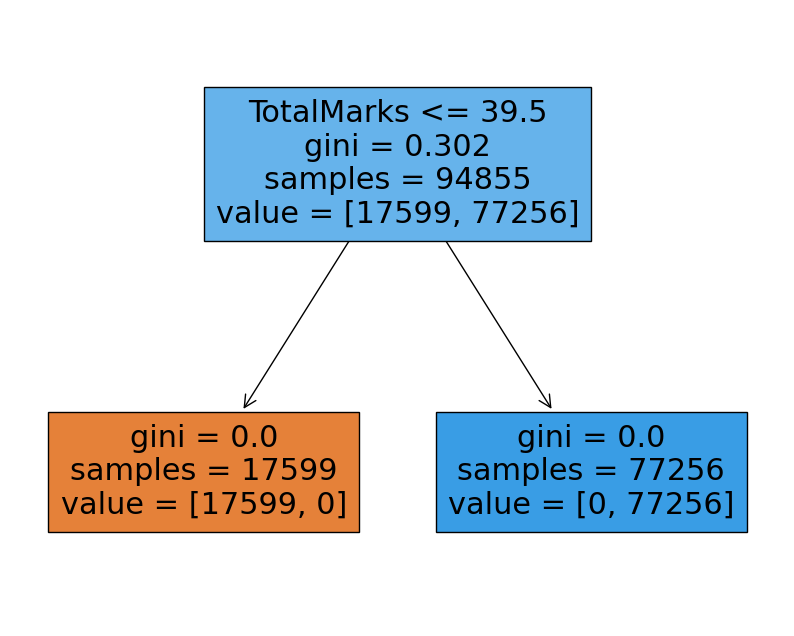

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plot_tree(decision_tree, filled=True, feature_names=features.columns)
plt.show()

In [ ]:
failed_students_1=failed_students.head(10)

In [ ]:
failed_students_1

,branch,yearsem,Actual_result,Predicted_result,HallticketNo,attendance percentage roundup,SubjectCode,subname,InternalMarks,ExternalMarks,TotalMarks,Thresh hold marks,result,Phone_number
0,CIVIL,2nd Year,0,0,11N01A0119,75,51001,ENGLISH,6,0,6,40,0,6302334283
1,CIVIL,2nd Year,0,1,11N01A0119,75,51001,ENGLISH,6,15,21,40,0,9392256799
2,CIVIL,2nd Year,0,0,11N01A0119,66,51001,ENGLISH,6,0,6,40,0,7780746543
3,CIVIL,2nd Year,0,1,11N01A0119,66,51001,ENGLISH,6,15,21,40,0,8074886837
4,CIVIL,2nd Year,0,0,11N01A0119,83,51001,ENGLISH,6,0,6,40,0,9390455861
5,CIVIL,2nd Year,0,1,11N01A0119,83,51001,ENGLISH,6,15,21,40,0,7093767993
6,CIVIL,2nd Year,0,0,11N01A0119,64,51001,ENGLISH,6,0,6,40,0,9032160903
7,CIVIL,2nd Year,0,1,11N01A0119,64,51001,ENGLISH,6,15,21,40,0,7995496049
8,CIVIL,2nd Year,0,0,11N01A0119,64,51001,ENGLISH,6,0,6,40,0,8500333358
9,CIVIL,2nd Year,0,1,11N01A0119,64,51001,ENGLISH,6,15,21,40,0,9704646320


## **Application Programming Interface for SMS**

In [ ]:
pip install requests

In [ ]:
import requests

In [ ]:
api_key = 'NzM3NTVhNzM1NTY4NzY0YzVhNTk3NTU1MzAzNzY1NzU='
sender = 'BIJILI MADHU'
message = 'Dear student, you have failed the exam. Please contact the administration for further information.'

In [ ]:
api_key = 'NzM3NTVhNzM1NTY4NzY0YzVhNTk3NTU1MzAzNzY1NzU='
sender = 'BIJILI MADHU'
message = 'Dear student, you have failed the exam. Please contact the administration for further information.'

Message sent successfully to 6302334283
Message sent successfully to 9392256799
Message sent successfully to 7780746543
Message sent successfully to 8074886837
Message sent successfully to 9390455861
Message sent successfully to 7093767993
Message sent successfully to 9032160903
Message sent successfully to 7995496049
Message sent successfully to 8500333358
Message sent successfully to 9704646320


## **Support Vector Machine(SVM)**

In [ ]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

SVC()

In [ ]:
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

K-Nearest Neighbours(KNN)

In [ ]:
knn_model = neighbors.KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)

## **Accuracy of the Models**

In [ ]:
print("Support Vector Machine Accuracy: ",svm_accuracy)
print("KNN Accuracy: ",knn_accuracy)
print("Decision Tree Accuracy: ", decision_tree_accuracy*100,"%")

Support Vector Machine Accuracy:  0.999016062775195
KNN Accuracy:  0.999016062775195
Decision Tree Accuracy:  100.0 %


## **Graph Plotts**

Packages

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Histigram

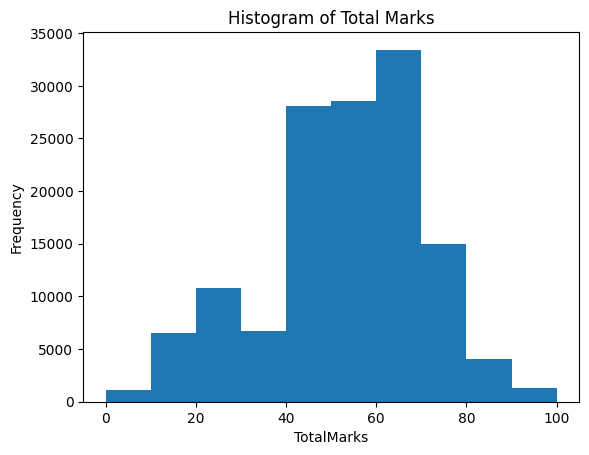

In [ ]:
plt.hist(table_1['TotalMarks'], bins=10)
plt.xlabel('TotalMarks')
plt.ylabel('Frequency')
plt.title('Histogram of Total Marks')
plt.show()

Line Plot

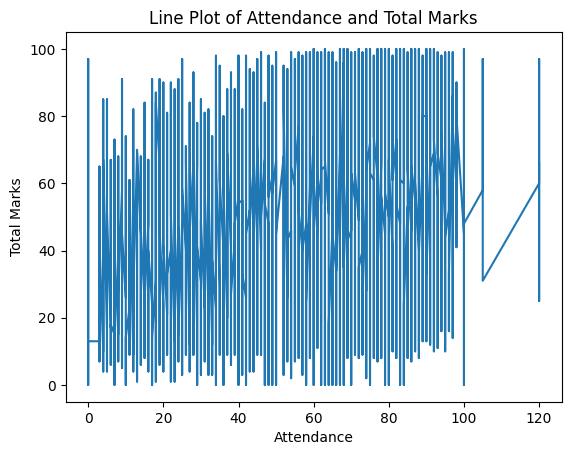

In [ ]:
sorted_data = table_1.sort_values('attendance percentage roundup')

# Plot a line plot of Total marks against Attendance
plt.plot(sorted_data['attendance percentage roundup'], sorted_data['TotalMarks'])
plt.xlabel('Attendance')
plt.ylabel('Total Marks')
plt.title('Line Plot of Attendance and Total Marks')
plt.show()

Bar Plot

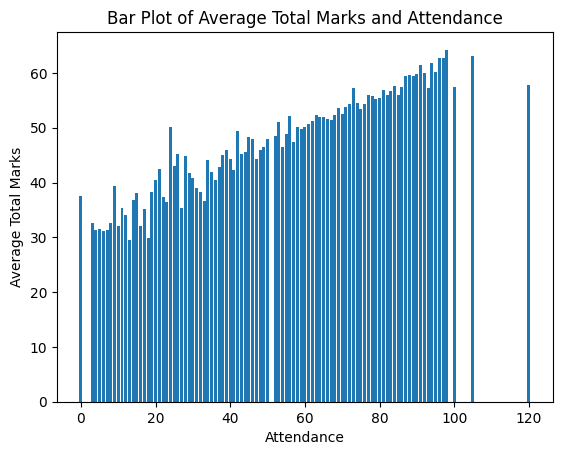

In [ ]:
avg_marks = table_1.groupby('attendance percentage roundup')['TotalMarks'].mean().reset_index()

# Plot a bar plot of Average Total marks against Attendance
plt.bar(avg_marks['attendance percentage roundup'], avg_marks['TotalMarks'])
plt.xlabel('Attendance')
plt.ylabel('Average Total Marks')
plt.title('Bar Plot of Average Total Marks and Attendance')
plt.show()